In [7]:
!pip install h5py pandas


In [8]:
!conda install -c conda-forge h5py pandas -y


Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DB2297\anaconda3

  added / updated specs:
    - h5py
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.12.14 |       h56e8100_0         154 KB  conda-forge
    certifi-2024.12.14         |     pyhd8ed1ab_0         158 KB  conda-forge
    h5py-3.12.1                |  py311h3b2c811_0         1.2 MB
    pandas-2.2.3               |  py311h5da7b33_0        14.7 MB
    ------------------------------------------------------------
                                           Total:        16.2 MB

The following packages will be UPDATED:

  ca-certificates                      2024.8.30-h56e8100_0 --> 2024.12.14-h56e8100_0 
  certifi                            2024.8.30-pyhd8ed1ab_0 --> 2024.12.14-pyhd8ed1ab_0 
  h5py              

Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\DB2297\anaconda3\Lib\site-packages\conda\plugins\types.py))
Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\DB2297\anaconda3\Lib\site-packages\conda\plugins\types.py))


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.11.3

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.3




In [10]:
!pip uninstall -y h5py

Found existing installation: h5py 3.12.1
Uninstalling h5py-3.12.1:
  Successfully uninstalled h5py-3.12.1


In [12]:
pip install h5py


   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB 435.7 kB/s eta 0:00:07
   - -------------------------------------- 0.1/3.0 MB 751.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/3.0 MB 1.4 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/3.0 MB 2.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.9/3.0 MB 3.4 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.0 MB 3.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.3/3.0 MB 3.7 MB/s eta 0:00:01
   -------------------- ------------------- 1.5/3.0 MB 3.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.7/3.0 MB 3.9 MB/s eta 0:00:01
   -------------------------- ------------- 2.0/3.0 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 2.3/3.0 MB 4.5 MB/s eta 0:00:01
   -------------------

In [14]:
import h5py
import pandas as pd

def hdf5_to_csv(file_path, output_csv):
    """
    Read an HDF5 file, extract relevant data, and save it to a CSV file.
    
    Parameters:
    file_path (str): Path to the HDF5 file.
    output_csv (str): Path to save the CSV file.
    """
    try:
        print("Starting compilation...")
        
        with h5py.File(file_path, 'r') as f:
            print(f"Opened HDF5 file: {file_path}")
            
            # List all top-level groups (e.g., gt12, gt11)
            beam_groups = [key for key in f.keys() if key.startswith("gt")]
            print(f"Found beam groups: {beam_groups}")
            
            all_data = []
            
            for beam in beam_groups:
                try:
                    # Access relevant datasets
                    group = f[beam]
                    photon_height = group['heights']['h_ph'][:]
                    latitude = group['heights']['lat_ph'][:]
                    longitude = group['heights']['lon_ph'][:]
                    confidence = group['heights']['signal_conf_ph'][:]
                    
                    # Combine into a DataFrame
                    df = pd.DataFrame({
                        "Beam": beam,
                        "Photon Height": photon_height,
                        "Latitude": latitude,
                        "Longitude": longitude,
                        "Confidence": confidence,
                    })
                    all_data.append(df)
                except KeyError as e:
                    print(f"Skipping {beam} due to missing dataset: {e}")
            
            # Combine all beams into one DataFrame
            combined_df = pd.concat(all_data, ignore_index=True)
            
            # Save to CSV
            combined_df.to_csv(output_csv, index=False)
            print(f"Compiling is done. Data successfully saved to {output_csv}")
    
    except Exception as e:
        print(f"Error: {e}")

# File paths
file_path = r'E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5'
output_csv = r'E:\Medha ka saaman\output.csv'

# Run the function
hdf5_to_csv(file_path, output_csv)


Starting compilation...
Opened HDF5 file: E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5
Found beam groups: ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
Error: Per-column arrays must each be 1-dimensional


In [15]:
import h5py
import pandas as pd

def hdf5_to_csv(file_path, output_csv):
    """
    Read an HDF5 file, extract relevant data, and save it to a CSV file.
    
    Parameters:
    file_path (str): Path to the HDF5 file.
    output_csv (str): Path to save the CSV file.
    """
    try:
        print("Starting compilation...")
        
        with h5py.File(file_path, 'r') as f:
            print(f"Opened HDF5 file: {file_path}")
            
            # List all top-level groups (e.g., gt12, gt11)
            beam_groups = [key for key in f.keys() if key.startswith("gt")]
            print(f"Found beam groups: {beam_groups}")
            
            all_data = []
            
            for beam in beam_groups:
                try:
                    # Access relevant datasets
                    group = f[beam]
                    photon_height = group['heights']['h_ph'][:]
                    latitude = group['heights']['lat_ph'][:]
                    longitude = group['heights']['lon_ph'][:]
                    confidence = group['heights']['signal_conf_ph'][:]
                    
                    # Print the shape of the arrays to debug
                    print(f"Shape of photon_height for {beam}: {photon_height.shape}")
                    print(f"Shape of latitude for {beam}: {latitude.shape}")
                    print(f"Shape of longitude for {beam}: {longitude.shape}")
                    print(f"Shape of confidence for {beam}: {confidence.shape}")
                    
                    # Check if confidence is multi-dimensional
                    if len(confidence.shape) == 2 and confidence.shape[1] == 5:
                        # Unpack the confidence array into separate columns
                        confidence_cols = [f"Confidence_{i+1}" for i in range(confidence.shape[1])]
                        confidence_df = pd.DataFrame(confidence, columns=confidence_cols)
                    else:
                        print(f"Skipping {beam} due to unexpected shape of confidence array.")
                        continue
                    
                    # Combine into a DataFrame
                    df = pd.DataFrame({
                        "Beam": beam,
                        "Photon Height": photon_height,
                        "Latitude": latitude,
                        "Longitude": longitude,
                    })
                    
                    # Concatenate the confidence columns
                    df = pd.concat([df, confidence_df], axis=1)
                    
                    all_data.append(df)
                except KeyError as e:
                    print(f"Skipping {beam} due to missing dataset: {e}")
            
            # Combine all beams into one DataFrame
            combined_df = pd.concat(all_data, ignore_index=True)
            
            # Save to CSV
            combined_df.to_csv(output_csv, index=False)
            print(f"Compiling is done. Data successfully saved to {output_csv}")
    
    except Exception as e:
        print(f"Error: {e}")

# File paths
file_path = r'E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5'
output_csv = r'E:\Medha ka saaman\output.csv'

# Run the function
hdf5_to_csv(file_path, output_csv)


Starting compilation...
Opened HDF5 file: E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5
Found beam groups: ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
Shape of photon_height for gt1l: (3412029,)
Shape of latitude for gt1l: (3412029,)
Shape of longitude for gt1l: (3412029,)
Shape of confidence for gt1l: (3412029, 5)
Shape of photon_height for gt1r: (9132301,)
Shape of latitude for gt1r: (9132301,)
Shape of longitude for gt1r: (9132301,)
Shape of confidence for gt1r: (9132301, 5)
Shape of photon_height for gt2l: (3230075,)
Shape of latitude for gt2l: (3230075,)
Shape of longitude for gt2l: (3230075,)
Shape of confidence for gt2l: (3230075, 5)
Shape of photon_height for gt2r: (7471303,)
Shape of latitude for gt2r: (7471303,)
Shape of longitude for gt2r: (7471303,)
Shape of confidence for gt2r: (7471303, 5)
Shape of photon_height for gt3l: (3151122,)
Shape of latitude for gt3l: (3151122,)
Shape of longitude for gt3l: (3151122,)
Shape of confidence for gt3l: (3151122, 5)

In [16]:
import h5py
import pandas as pd

def hdf5_to_csv(file_path, output_csv_all, output_csv_conf2, output_csv_conf5):
    """
    Read an HDF5 file, extract relevant data, and save it to three CSV files:
    - One with all data and second confidence (filtered).
    - One with all data and second confidence (filtered).
    - One with all data and fifth confidence (filtered).
    
    Parameters:
    file_path (str): Path to the HDF5 file.
    output_csv_all (str): Path to save the combined CSV with all data.
    output_csv_conf2 (str): Path to save the CSV with second confidence.
    output_csv_conf5 (str): Path to save the CSV with fifth confidence.
    """
    try:
        print("Starting compilation...")
        
        with h5py.File(file_path, 'r') as f:
            print(f"Opened HDF5 file: {file_path}")
            
            # List all top-level groups (e.g., gt12, gt11)
            beam_groups = [key for key in f.keys() if key.startswith("gt")]
            print(f"Found beam groups: {beam_groups}")
            
            all_data = []
            conf2_data = []
            conf5_data = []
            
            for beam in beam_groups:
                try:
                    # Access relevant datasets
                    group = f[beam]
                    photon_height = group['heights']['h_ph'][:]
                    latitude = group['heights']['lat_ph'][:]
                    longitude = group['heights']['lon_ph'][:]
                    confidence = group['heights']['signal_conf_ph'][:]
                    
                    # Check if confidence is multi-dimensional
                    if len(confidence.shape) == 2 and confidence.shape[1] == 5:
                        # Extract only the second and fifth confidence columns
                        confidence_2nd = confidence[:, 1]  # Second confidence value
                        confidence_5th = confidence[:, 4]  # Fifth confidence value
                        
                        # Filter out confidence values below 3
                        mask_2nd = (confidence_2nd >= 3)
                        mask_5th = (confidence_5th >= 3)
                        
                        # Filter data based on confidence
                        valid_photon_height_2nd = photon_height[mask_2nd]
                        valid_latitude_2nd = latitude[mask_2nd]
                        valid_longitude_2nd = longitude[mask_2nd]
                        valid_conf2 = confidence_2nd[mask_2nd]
                        
                        valid_photon_height_5th = photon_height[mask_5th]
                        valid_latitude_5th = latitude[mask_5th]
                        valid_longitude_5th = longitude[mask_5th]
                        valid_conf5 = confidence_5th[mask_5th]
                        
                        # Append to respective lists
                        conf2_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": valid_photon_height_2nd,
                            "Latitude": valid_latitude_2nd,
                            "Longitude": valid_longitude_2nd,
                            "Confidence_2nd": valid_conf2
                        }))
                        
                        conf5_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": valid_photon_height_5th,
                            "Latitude": valid_latitude_5th,
                            "Longitude": valid_longitude_5th,
                            "Confidence_5th": valid_conf5
                        }))
                        
                        # For the 'all_data' CSV, keep all data and only filter for second and fifth confidences >= 3
                        all_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": photon_height,
                            "Latitude": latitude,
                            "Longitude": longitude,
                            "Confidence_2nd": confidence_2nd,
                            "Confidence_5th": confidence_5th
                        }))
                    else:
                        print(f"Skipping {beam} due to unexpected shape of confidence array.")
                        continue
                except KeyError as e:
                    print(f"Skipping {beam} due to missing dataset: {e}")
            
            # Combine all beams into one DataFrame
            combined_all_data = pd.concat(all_data, ignore_index=True)
            combined_conf2_data = pd.concat(conf2_data, ignore_index=True)
            combined_conf5_data = pd.concat(conf5_data, ignore_index=True)
            
            # Save to CSV
            combined_all_data.to_csv(output_csv_all, index=False)
            combined_conf2_data.to_csv(output_csv_conf2, index=False)
            combined_conf5_data.to_csv(output_csv_conf5, index=False)
            
            print(f"Compiling is done. Data successfully saved to {output_csv_all}, {output_csv_conf2}, {output_csv_conf5}")
    
    except Exception as e:
        print(f"Error: {e}")

# File paths
file_path = r'E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5'
output_csv_all = r'E:\Medha ka saaman\all_data.csv'
output_csv_conf2 = r'E:\Medha ka saaman\confidence_2nd.csv'
output_csv_conf5 = r'E:\Medha ka saaman\confidence_5th.csv'

# Run the function
hdf5_to_csv(file_path, output_csv_all, output_csv_conf2, output_csv_conf5)


Starting compilation...
Opened HDF5 file: E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5
Found beam groups: ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
Compiling is done. Data successfully saved to E:\Medha ka saaman\all_data.csv, E:\Medha ka saaman\confidence_2nd.csv, E:\Medha ka saaman\confidence_5th.csv


In [17]:
import h5py
import pandas as pd
import math

def hdf5_to_csv(file_path, output_csv_all, output_csv_conf2, output_csv_conf5, chunk_size=100000):
    """
    Read an HDF5 file, extract relevant data, and save it to multiple CSV files:
    - One with all data and second confidence (filtered).
    - One with all data and second confidence (filtered).
    - One with all data and fifth confidence (filtered).
    
    The data will be split into multiple files if the number of rows exceeds `chunk_size`.
    
    Parameters:
    file_path (str): Path to the HDF5 file.
    output_csv_all (str): Path to save the combined CSV with all data.
    output_csv_conf2 (str): Path to save the CSV with second confidence.
    output_csv_conf5 (str): Path to save the CSV with fifth confidence.
    chunk_size (int): Number of rows per CSV file.
    """
    try:
        print("Starting compilation...")
        
        with h5py.File(file_path, 'r') as f:
            print(f"Opened HDF5 file: {file_path}")
            
            # List all top-level groups (e.g., gt12, gt11)
            beam_groups = [key for key in f.keys() if key.startswith("gt")]
            print(f"Found beam groups: {beam_groups}")
            
            all_data = []
            conf2_data = []
            conf5_data = []
            
            for beam in beam_groups:
                try:
                    # Access relevant datasets
                    group = f[beam]
                    photon_height = group['heights']['h_ph'][:]
                    latitude = group['heights']['lat_ph'][:]
                    longitude = group['heights']['lon_ph'][:]
                    confidence = group['heights']['signal_conf_ph'][:]
                    
                    # Check if confidence is multi-dimensional
                    if len(confidence.shape) == 2 and confidence.shape[1] == 5:
                        # Extract only the second and fifth confidence columns
                        confidence_2nd = confidence[:, 1]  # Second confidence value
                        confidence_5th = confidence[:, 4]  # Fifth confidence value
                        
                        # Filter out confidence values below 3
                        mask_2nd = (confidence_2nd >= 3)
                        mask_5th = (confidence_5th >= 3)
                        
                        # Filter data based on confidence
                        valid_photon_height_2nd = photon_height[mask_2nd]
                        valid_latitude_2nd = latitude[mask_2nd]
                        valid_longitude_2nd = longitude[mask_2nd]
                        valid_conf2 = confidence_2nd[mask_2nd]
                        
                        valid_photon_height_5th = photon_height[mask_5th]
                        valid_latitude_5th = latitude[mask_5th]
                        valid_longitude_5th = longitude[mask_5th]
                        valid_conf5 = confidence_5th[mask_5th]
                        
                        # Append to respective lists
                        conf2_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": valid_photon_height_2nd,
                            "Latitude": valid_latitude_2nd,
                            "Longitude": valid_longitude_2nd,
                            "Confidence_2nd": valid_conf2
                        }))
                        
                        conf5_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": valid_photon_height_5th,
                            "Latitude": valid_latitude_5th,
                            "Longitude": valid_longitude_5th,
                            "Confidence_5th": valid_conf5
                        }))
                        
                        # For the 'all_data' CSV, keep all data and only filter for second and fifth confidences >= 3
                        all_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": photon_height,
                            "Latitude": latitude,
                            "Longitude": longitude,
                            "Confidence_2nd": confidence_2nd,
                            "Confidence_5th": confidence_5th
                        }))
                    else:
                        print(f"Skipping {beam} due to unexpected shape of confidence array.")
                        continue
                except KeyError as e:
                    print(f"Skipping {beam} due to missing dataset: {e}")
            
            # Combine all beams into one DataFrame
            combined_all_data = pd.concat(all_data, ignore_index=True)
            combined_conf2_data = pd.concat(conf2_data, ignore_index=True)
            combined_conf5_data = pd.concat(conf5_data, ignore_index=True)
            
            # Function to split data into chunks and save
            def save_in_chunks(data, base_filename, chunk_size):
                total_rows = len(data)
                num_chunks = math.ceil(total_rows / chunk_size)
                
                for i in range(num_chunks):
                    chunk = data.iloc[i * chunk_size:(i + 1) * chunk_size]
                    chunk.to_csv(f"{base_filename}_part{i+1}.csv", index=False)
                    print(f"Saved {base_filename}_part{i+1}.csv")
            
            # Save to multiple CSVs
            save_in_chunks(combined_all_data, output_csv_all, chunk_size)
            save_in_chunks(combined_conf2_data, output_csv_conf2, chunk_size)
            save_in_chunks(combined_conf5_data, output_csv_conf5, chunk_size)
            
            print("Compiling is done. Data successfully saved to multiple CSV files.")
    
    except Exception as e:
        print(f"Error: {e}")

# File paths
file_path = r'E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5'
output_csv_all = r'E:\Medha ka saaman\all_data'
output_csv_conf2 = r'E:\Medha ka saaman\confidence_2nd'
output_csv_conf5 = r'E:\Medha ka saaman\confidence_5th'

# Run the function
hdf5_to_csv(file_path, output_csv_all, output_csv_conf2, output_csv_conf5)


Starting compilation...
Opened HDF5 file: E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5
Found beam groups: ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
Saved E:\Medha ka saaman\all_data_part1.csv
Saved E:\Medha ka saaman\all_data_part2.csv
Saved E:\Medha ka saaman\all_data_part3.csv
Saved E:\Medha ka saaman\all_data_part4.csv
Saved E:\Medha ka saaman\all_data_part5.csv
Saved E:\Medha ka saaman\all_data_part6.csv
Saved E:\Medha ka saaman\all_data_part7.csv
Saved E:\Medha ka saaman\all_data_part8.csv
Saved E:\Medha ka saaman\all_data_part9.csv
Saved E:\Medha ka saaman\all_data_part10.csv
Saved E:\Medha ka saaman\all_data_part11.csv
Saved E:\Medha ka saaman\all_data_part12.csv
Saved E:\Medha ka saaman\all_data_part13.csv
Saved E:\Medha ka saaman\all_data_part14.csv
Saved E:\Medha ka saaman\all_data_part15.csv
Saved E:\Medha ka saaman\all_data_part16.csv
Saved E:\Medha ka saaman\all_data_part17.csv
Saved E:\Medha ka saaman\all_data_part18.csv
Saved E:\Medha ka saaman\all

Saved E:\Medha ka saaman\all_data_part178.csv
Saved E:\Medha ka saaman\all_data_part179.csv
Saved E:\Medha ka saaman\all_data_part180.csv
Saved E:\Medha ka saaman\all_data_part181.csv
Saved E:\Medha ka saaman\all_data_part182.csv
Saved E:\Medha ka saaman\all_data_part183.csv
Saved E:\Medha ka saaman\all_data_part184.csv
Saved E:\Medha ka saaman\all_data_part185.csv
Saved E:\Medha ka saaman\all_data_part186.csv
Saved E:\Medha ka saaman\all_data_part187.csv
Saved E:\Medha ka saaman\all_data_part188.csv
Saved E:\Medha ka saaman\all_data_part189.csv
Saved E:\Medha ka saaman\all_data_part190.csv
Saved E:\Medha ka saaman\all_data_part191.csv
Saved E:\Medha ka saaman\all_data_part192.csv
Saved E:\Medha ka saaman\all_data_part193.csv
Saved E:\Medha ka saaman\all_data_part194.csv
Saved E:\Medha ka saaman\all_data_part195.csv
Saved E:\Medha ka saaman\all_data_part196.csv
Saved E:\Medha ka saaman\all_data_part197.csv
Saved E:\Medha ka saaman\all_data_part198.csv
Saved E:\Medha ka saaman\all_data_

Saved E:\Medha ka saaman\confidence_2nd_part4.csv
Saved E:\Medha ka saaman\confidence_2nd_part5.csv
Saved E:\Medha ka saaman\confidence_2nd_part6.csv
Saved E:\Medha ka saaman\confidence_2nd_part7.csv
Saved E:\Medha ka saaman\confidence_2nd_part8.csv
Saved E:\Medha ka saaman\confidence_2nd_part9.csv
Saved E:\Medha ka saaman\confidence_2nd_part10.csv
Saved E:\Medha ka saaman\confidence_2nd_part11.csv
Saved E:\Medha ka saaman\confidence_2nd_part12.csv
Saved E:\Medha ka saaman\confidence_2nd_part13.csv
Saved E:\Medha ka saaman\confidence_2nd_part14.csv
Saved E:\Medha ka saaman\confidence_2nd_part15.csv
Saved E:\Medha ka saaman\confidence_2nd_part16.csv
Saved E:\Medha ka saaman\confidence_2nd_part17.csv
Saved E:\Medha ka saaman\confidence_2nd_part18.csv
Saved E:\Medha ka saaman\confidence_2nd_part19.csv
Saved E:\Medha ka saaman\confidence_2nd_part20.csv
Saved E:\Medha ka saaman\confidence_2nd_part21.csv
Saved E:\Medha ka saaman\confidence_2nd_part22.csv
Saved E:\Medha ka saaman\confidence_2

In [18]:
import h5py
import pandas as pd
import math

def hdf5_to_csv(file_path, output_csv_conf2, output_csv_conf5, chunk_size=100000):
    """
    Read an HDF5 file, extract relevant data, and save it to CSV files:
    - One with second confidence >= 4.
    - One with fifth confidence >= 4.
    
    The data will be split into multiple files if the number of rows exceeds `chunk_size`.
    
    Parameters:
    file_path (str): Path to the HDF5 file.
    output_csv_conf2 (str): Path to save the CSV with second confidence (filtered).
    output_csv_conf5 (str): Path to save the CSV with fifth confidence (filtered).
    chunk_size (int): Number of rows per CSV file.
    """
    try:
        print("Starting compilation...")
        
        with h5py.File(file_path, 'r') as f:
            print(f"Opened HDF5 file: {file_path}")
            
            # List all top-level groups (e.g., gt12, gt11)
            beam_groups = [key for key in f.keys() if key.startswith("gt")]
            print(f"Found beam groups: {beam_groups}")
            
            conf2_data = []
            conf5_data = []
            
            for beam in beam_groups:
                try:
                    # Access relevant datasets
                    group = f[beam]
                    photon_height = group['heights']['h_ph'][:]
                    latitude = group['heights']['lat_ph'][:]
                    longitude = group['heights']['lon_ph'][:]
                    confidence = group['heights']['signal_conf_ph'][:]
                    
                    # Check if confidence is multi-dimensional
                    if len(confidence.shape) == 2 and confidence.shape[1] == 5:
                        # Extract only the second and fifth confidence columns
                        confidence_2nd = confidence[:, 1]  # Second confidence value
                        confidence_5th = confidence[:, 4]  # Fifth confidence value
                        
                        # Filter out confidence values below 4
                        mask_2nd = (confidence_2nd >= 4)
                        mask_5th = (confidence_5th >= 4)
                        
                        # Filter data based on confidence
                        valid_photon_height_2nd = photon_height[mask_2nd]
                        valid_latitude_2nd = latitude[mask_2nd]
                        valid_longitude_2nd = longitude[mask_2nd]
                        valid_conf2 = confidence_2nd[mask_2nd]
                        
                        valid_photon_height_5th = photon_height[mask_5th]
                        valid_latitude_5th = latitude[mask_5th]
                        valid_longitude_5th = longitude[mask_5th]
                        valid_conf5 = confidence_5th[mask_5th]
                        
                        # Append to respective lists
                        conf2_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": valid_photon_height_2nd,
                            "Latitude": valid_latitude_2nd,
                            "Longitude": valid_longitude_2nd,
                            "Confidence_2nd": valid_conf2
                        }))
                        
                        conf5_data.append(pd.DataFrame({
                            "Beam": beam,
                            "Photon Height": valid_photon_height_5th,
                            "Latitude": valid_latitude_5th,
                            "Longitude": valid_longitude_5th,
                            "Confidence_5th": valid_conf5
                        }))
                    else:
                        print(f"Skipping {beam} due to unexpected shape of confidence array.")
                        continue
                except KeyError as e:
                    print(f"Skipping {beam} due to missing dataset: {e}")
            
            # Combine all beams into one DataFrame for each confidence level
            combined_conf2_data = pd.concat(conf2_data, ignore_index=True)
            combined_conf5_data = pd.concat(conf5_data, ignore_index=True)
            
            # Function to split data into chunks and save
            def save_in_chunks(data, base_filename, chunk_size):
                total_rows = len(data)
                num_chunks = math.ceil(total_rows / chunk_size)
                
                for i in range(num_chunks):
                    chunk = data.iloc[i * chunk_size:(i + 1) * chunk_size]
                    chunk.to_csv(f"{base_filename}_part{i+1}.csv", index=False)
                    print(f"Saved {base_filename}_part{i+1}.csv")
            
            # Save to multiple CSVs
            save_in_chunks(combined_conf2_data, output_csv_conf2, chunk_size)
            save_in_chunks(combined_conf5_data, output_csv_conf5, chunk_size)
            
            print("Compiling is done. Data successfully saved to multiple CSV files.")
    
    except Exception as e:
        print(f"Error: {e}")

# File paths
file_path = r'E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5'
output_csv_conf2 = r'E:\Medha ka saaman\confidence_2nd'
output_csv_conf5 = r'E:\Medha ka saaman\confidence_5th'

# Run the function
hdf5_to_csv(file_path, output_csv_conf2, output_csv_conf5)


Starting compilation...
Opened HDF5 file: E:\Medha ka saaman\2\ATL03_20181031083038_05000101_006_02.h5
Found beam groups: ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
Saved E:\Medha ka saaman\confidence_2nd_part1.csv
Saved E:\Medha ka saaman\confidence_2nd_part2.csv
Saved E:\Medha ka saaman\confidence_2nd_part3.csv
Saved E:\Medha ka saaman\confidence_2nd_part4.csv
Saved E:\Medha ka saaman\confidence_2nd_part5.csv
Saved E:\Medha ka saaman\confidence_2nd_part6.csv
Saved E:\Medha ka saaman\confidence_2nd_part7.csv
Saved E:\Medha ka saaman\confidence_2nd_part8.csv
Saved E:\Medha ka saaman\confidence_2nd_part9.csv
Saved E:\Medha ka saaman\confidence_2nd_part10.csv
Saved E:\Medha ka saaman\confidence_2nd_part11.csv
Saved E:\Medha ka saaman\confidence_2nd_part12.csv
Saved E:\Medha ka saaman\confidence_2nd_part13.csv
Saved E:\Medha ka saaman\confidence_2nd_part14.csv
Saved E:\Medha ka saaman\confidence_2nd_part15.csv
Saved E:\Medha ka saaman\confidence_2nd_part16.csv
Saved E:\Medha ka saam

In [26]:
import h5py
import pandas as pd
import math
import os

def hdf5_to_csv_for_folder(input_folder, output_folder, chunk_size=100000):
    """
    Process all HDF5 files in a folder, extract relevant data, and save them to CSV files:
    - One with second confidence >= 4.
    - One with fifth confidence >= 4.
    
    The data will be split into multiple files if the number of rows exceeds `chunk_size`.
    
    Parameters:
    input_folder (str): Path to the folder containing HDF5 files.
    output_folder (str): Path to save the CSV files.
    chunk_size (int): Number of rows per CSV file.
    """
    try:
        # Create output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Get all .h5 files in the input folder
        h5_files = [f for f in os.listdir(input_folder) if f.endswith('.h5')]
        print(f"Found {len(h5_files)} HDF5 files in the folder.")
        
        for file in h5_files:
            file_path = os.path.join(input_folder, file)
            print(f"Processing file: {file_path}")
            
            # Output filenames based on the HDF5 file name
            output_csv_conf2 = os.path.join(output_folder, f"{os.path.splitext(file)[0]}_confidence_2nd")
            output_csv_conf5 = os.path.join(output_folder, f"{os.path.splitext(file)[0]}_confidence_5th")

            with h5py.File(file_path, 'r') as f:
                print(f"Opened HDF5 file: {file_path}")
                
                # List all top-level groups (e.g., gt12, gt11)
                beam_groups = [key for key in f.keys() if key.startswith("gt")]
                print(f"Found beam groups: {beam_groups}")
                
                conf2_data = []
                conf5_data = []
                
                for beam in beam_groups:
                    try:
                        # Access relevant datasets
                        group = f[beam]
                        photon_height = group['heights']['h_ph'][:]
                        latitude = group['heights']['lat_ph'][:]
                        longitude = group['heights']['lon_ph'][:]
                        confidence = group['heights']['signal_conf_ph'][:]
                        
                        # Check if confidence is multi-dimensional
                        if len(confidence.shape) == 2 and confidence.shape[1] == 5:
                            # Extract only the second and fifth confidence columns
                            confidence_2nd = confidence[:, 1]  # Second confidence value
                            confidence_5th = confidence[:, 4]  # Fifth confidence value
                            
                            # Filter out confidence values below 4
                            mask_2nd = (confidence_2nd >= 4)
                            mask_5th = (confidence_5th >= 4)
                            
                            # Filter data based on confidence
                            valid_photon_height_2nd = photon_height[mask_2nd]
                            valid_latitude_2nd = latitude[mask_2nd]
                            valid_longitude_2nd = longitude[mask_2nd]
                            valid_conf2 = confidence_2nd[mask_2nd]
                            
                            valid_photon_height_5th = photon_height[mask_5th]
                            valid_latitude_5th = latitude[mask_5th]
                            valid_longitude_5th = longitude[mask_5th]
                            valid_conf5 = confidence_5th[mask_5th]
                            
                            # Append to respective lists
                            conf2_data.append(pd.DataFrame({
                                "Beam": beam,
                                "Photon Height": valid_photon_height_2nd,
                                "Latitude": valid_latitude_2nd,
                                "Longitude": valid_longitude_2nd,
                                "Confidence_2nd": valid_conf2
                            }))
                            
                            conf5_data.append(pd.DataFrame({
                                "Beam": beam,
                                "Photon Height": valid_photon_height_5th,
                                "Latitude": valid_latitude_5th,
                                "Longitude": valid_longitude_5th,
                                "Confidence_5th": valid_conf5
                            }))
                        else:
                            print(f"Skipping {beam} due to unexpected shape of confidence array.")
                            continue
                    except KeyError as e:
                        print(f"Skipping {beam} due to missing dataset: {e}")
                
                # Combine all beams into one DataFrame for each confidence level
                combined_conf2_data = pd.concat(conf2_data, ignore_index=True)
                combined_conf5_data = pd.concat(conf5_data, ignore_index=True)
                
                # Function to split data into chunks and save
                def save_in_chunks(data, base_filename, chunk_size):
                    total_rows = len(data)
                    num_chunks = math.ceil(total_rows / chunk_size)
                    
                    for i in range(num_chunks):
                        chunk = data.iloc[i * chunk_size:(i + 1) * chunk_size]
                        chunk.to_csv(f"{base_filename}_part{i+1}.csv", index=False)
                        print(f"Saved {base_filename}_part{i+1}.csv")
                
                # Save to multiple CSVs
                save_in_chunks(combined_conf2_data, output_csv_conf2, chunk_size)
                save_in_chunks(combined_conf5_data, output_csv_conf5, chunk_size)
                
                print(f"Finished processing file: {file_path}")
        
        print("Compiling is done. Data successfully saved to multiple CSV files.")
    
    except Exception as e:
        print(f"Error: {e}")

# Input folder with HDF5 files
input_folder = r'E:\Medha ka saaman\2\leftover'
# Output folder for CSV files
output_folder = os.path.join(input_folder, 'output_csv')

# Run the function
hdf5_to_csv_for_folder(input_folder, output_folder)


Found 19 HDF5 files in the folder.
Processing file: E:\Medha ka saaman\2\leftover\ATL03_20201223070647_13760907_006_01.h5
Error: Unable to synchronously open file (file signature not found)


In [21]:
pip install geopandas


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/323.6 kB ? eta -:--:--
   --- ----------------------------------- 30.7/323.6 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/323.6 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------  317.4/323.6 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.2 MB 3.6 MB/s eta 0:00:05
   ---------------------------------------- 0.2/16.2 MB 2.2 MB/s eta 0:00:08
    --------------------------------------- 0.3/16.2 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.4/16.2 MB 2.4 MB/s eta 0:00:07
   - -------------------------------------- 0.7/16.2 MB 2.9 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/16.2 MB 3.6 MB/s eta 0:00:05
   --

In [22]:
!pip install geopandas


C:\Users\DB2297\AppData\Local\Temp\ipykernel_8332\391129644.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geojson_union = geojson_data.geometry.unary_union
C:\Users\DB2297\AppData\Local\Temp\ipykernel_8332\391129644.py:52: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)
C:\Users\DB2297\AppData\Local\Temp\ipykernel_8332\391129644.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)


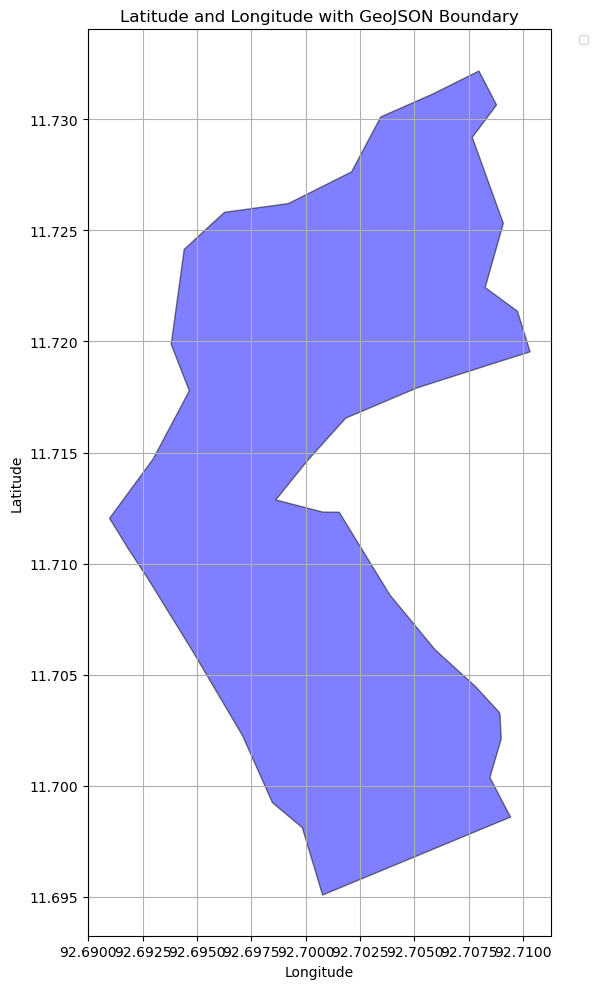

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Point

# Folder containing the CSV files
folder_path = r"E:\Medha ka saaman\2\output_csv"

# GeoJSON file path
geojson_path = r"E:\Medha ka saaman\andaman350geojason.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.unary_union

# Initialize the plot
plt.figure(figsize=(12, 10))

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
       
        # Read the CSV file
        df = pd.read_csv(file_path)
       
        # Ensure the required columns exist
        if 'latitude' in df.columns and 'longitude' in df.columns:
            # Convert the dataframe to a GeoDataFrame of points
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['longitude'], df['latitude']))

            # Check which points are inside the GeoJSON region using union_all()
            points_in_geojson = points[points.geometry.within(geojson_union)]

            # If there are points inside the GeoJSON, plot them
            if not points_in_geojson.empty:
                plt.scatter(points_in_geojson['longitude'], points_in_geojson['latitude'], s=10, label=file_name)

# Plot the GeoJSON boundary
geojson_data.plot(ax=plt.gca(), color='blue', edgecolor='black', alpha=0.5, label="GeoJSON Region")

# Customize the plot
plt.title("Latitude and Longitude with GeoJSON Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Place the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to fit legend
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right for the legend

# Show the plot
plt.show()   


In [27]:
import h5py
import pandas as pd
import math
import os

def hdf5_to_csv_for_folder(input_folder, output_folder, chunk_size=100000):
    """
    Process all HDF5 files in a folder, extract relevant data, and save them to CSV files:
    - One with second confidence >= 4.
    - One with fifth confidence >= 4.
    
    The data will be split into multiple files if the number of rows exceeds `chunk_size`.
    
    Parameters:
    input_folder (str): Path to the folder containing HDF5 files.
    output_folder (str): Path to save the CSV files.
    chunk_size (int): Number of rows per CSV file.
    """
    try:
        # Create output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Get all .h5 files in the input folder
        h5_files = [f for f in os.listdir(input_folder) if f.endswith('.h5')]
        print(f"Found {len(h5_files)} HDF5 files in the folder.")
        
        for file in h5_files:
            file_path = os.path.join(input_folder, file)
            print(f"Processing file: {file_path}")

            # Output filenames based on the HDF5 file name
            output_csv_conf2 = os.path.join(output_folder, f"{os.path.splitext(file)[0]}_confidence_2nd")
            output_csv_conf5 = os.path.join(output_folder, f"{os.path.splitext(file)[0]}_confidence_5th")

            try:
                with h5py.File(file_path, 'r') as f:
                    print(f"Opened HDF5 file: {file_path}")

                    # List all beam groups
                    beam_groups = [key for key in f.keys() if key.startswith("gt")]
                    print(f"Found beam groups: {beam_groups}")
                    
                    conf2_data = []
                    conf5_data = []

                    for beam in beam_groups:
                        try:
                            group = f[beam]
                            photon_height = group['heights']['h_ph'][:]
                            latitude = group['heights']['lat_ph'][:]
                            longitude = group['heights']['lon_ph'][:]
                            confidence = group['heights']['signal_conf_ph'][:]

                            if len(confidence.shape) == 2 and confidence.shape[1] == 5:
                                confidence_2nd = confidence[:, 1]
                                confidence_5th = confidence[:, 4]

                                mask_2nd = (confidence_2nd >= 4)
                                mask_5th = (confidence_5th >= 4)

                                valid_photon_height_2nd = photon_height[mask_2nd]
                                valid_latitude_2nd = latitude[mask_2nd]
                                valid_longitude_2nd = longitude[mask_2nd]
                                valid_conf2 = confidence_2nd[mask_2nd]

                                valid_photon_height_5th = photon_height[mask_5th]
                                valid_latitude_5th = latitude[mask_5th]
                                valid_longitude_5th = longitude[mask_5th]
                                valid_conf5 = confidence_5th[mask_5th]

                                conf2_data.append(pd.DataFrame({
                                    "Beam": beam,
                                    "Photon Height": valid_photon_height_2nd,
                                    "Latitude": valid_latitude_2nd,
                                    "Longitude": valid_longitude_2nd,
                                    "Confidence_2nd": valid_conf2
                                }))
                                
                                conf5_data.append(pd.DataFrame({
                                    "Beam": beam,
                                    "Photon Height": valid_photon_height_5th,
                                    "Latitude": valid_latitude_5th,
                                    "Longitude": valid_longitude_5th,
                                    "Confidence_5th": valid_conf5
                                }))
                            else:
                                print(f"Skipping {beam} due to unexpected shape of confidence array.")
                                continue
                        except KeyError as e:
                            print(f"Skipping {beam} due to missing dataset: {e}")

                    combined_conf2_data = pd.concat(conf2_data, ignore_index=True)
                    combined_conf5_data = pd.concat(conf5_data, ignore_index=True)

                    def save_in_chunks(data, base_filename, chunk_size):
                        total_rows = len(data)
                        num_chunks = math.ceil(total_rows / chunk_size)
                        for i in range(num_chunks):
                            chunk = data.iloc[i * chunk_size:(i + 1) * chunk_size]
                            chunk.to_csv(f"{base_filename}_part{i+1}.csv", index=False)
                            print(f"Saved {base_filename}_part{i+1}.csv")

                    save_in_chunks(combined_conf2_data, output_csv_conf2, chunk_size)
                    save_in_chunks(combined_conf5_data, output_csv_conf5, chunk_size)
                    print(f"Finished processing file: {file_path}")
            except (OSError, IOError) as e:
                print(f"Error opening or processing file {file_path}: {e}")
                continue  # Skip to the next file if there's an error

        print("Compiling is done. Data successfully saved to multiple CSV files.")
    
    except Exception as e:
        print(f"Error: {e}")

# Input folder with HDF5 files
input_folder = r'E:\Medha ka saaman\2\leftover'
# Output folder for CSV files
output_folder = os.path.join(input_folder, 'output_csv')

# Run the function
hdf5_to_csv_for_folder(input_folder, output_folder)


Found 19 HDF5 files in the folder.
Processing file: E:\Medha ka saaman\2\leftover\ATL03_20201223070647_13760907_006_01.h5
Error opening or processing file E:\Medha ka saaman\2\leftover\ATL03_20201223070647_13760907_006_01.h5: Unable to synchronously open file (file signature not found)
Processing file: E:\Medha ka saaman\2\leftover\ATL03_20210125172850_05001001_006_01.h5
Opened HDF5 file: E:\Medha ka saaman\2\leftover\ATL03_20210125172850_05001001_006_01.h5
Found beam groups: ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_2nd_part1.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_2nd_part2.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_2nd_part3.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_2nd_part4.csv
Saved E:\Medha ka saaman\2\leftove

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part13.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part14.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part15.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part16.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part17.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part18.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part19.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part20.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210125172850_05001001_006_01_confidence_5th_part21.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part59.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part60.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part61.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part62.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part63.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part64.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part65.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part66.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part67.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part134.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part135.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part136.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part137.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part138.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part139.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part140.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part141.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_2nd_part142.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part42.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part43.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part44.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part45.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part46.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part47.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part48.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part49.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210426130840_05001101_006_02_confidence_5th_part50.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part51.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part52.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part53.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part54.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part55.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part56.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part57.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part58.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20210726084832_05001201_006_01_confidence_2nd_part59.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part22.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part23.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part24.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part25.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part26.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part27.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part28.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part29.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part30.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part97.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part98.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part99.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part100.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part101.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part102.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part103.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part104.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part105.csv
Save

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part171.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part172.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part173.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part174.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part175.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part176.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part177.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part178.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part179.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part245.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part246.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part247.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part248.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part249.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part250.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part251.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part252.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part253.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part319.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part320.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part321.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part322.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part323.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part324.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part325.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part326.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part327.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part393.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part394.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part395.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part396.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part397.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part398.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part399.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part400.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part401.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part467.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part468.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part469.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part470.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part471.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part472.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part473.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part474.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part475.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part541.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part542.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part543.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part544.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part545.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part546.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part547.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part548.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_2nd_part549.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_5th_part55.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_5th_part56.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_5th_part57.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220124000823_05001401_006_01_confidence_5th_part58.csv
Finished processing file: E:\Medha ka saaman\2\leftover\ATL03_20220124000823_05001401_006_01.h5
Processing file: E:\Medha ka saaman\2\leftover\ATL03_20220322092614_13761407_006_01.h5
Opened HDF5 file: E:\Medha ka saaman\2\leftover\ATL03_20220322092614_13761407_006_01.h5
Found beam groups: ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220322092614_13761407_006_01_confidence_2nd_part1.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220322092614_13761407_006_01_confidence_2nd_part2.csv
Sav

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part39.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part40.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part41.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part42.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part43.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part44.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part45.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part46.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part47.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part114.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part115.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part116.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part117.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part118.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part119.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part120.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part121.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220424194815_05001501_006_02_confidence_2nd_part122.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part5.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part6.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part7.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part8.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part9.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part10.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part11.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part12.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20220920004603_13761607_006_01_confidence_2nd_part13.csv
Saved E:\Medha 

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part29.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part30.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part31.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part32.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part33.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part34.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part35.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part36.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20221219202537_13761707_006_02_confidence_2nd_part37.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part5.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part6.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part7.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part8.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part9.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part10.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part11.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part12.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230619114457_13761907_006_02_confidence_2nd_part13.csv
Saved E:\Medha 

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part4.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part5.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part6.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part7.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part8.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part9.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part10.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part11.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20230918072419_13762007_006_02_confidence_2nd_part12.csv
Saved E:\Medha k

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part48.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part49.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part50.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part51.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part52.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part53.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part54.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part55.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231021174615_05002101_006_02_confidence_2nd_part56.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part48.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part49.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part50.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part51.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part52.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part53.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part54.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part55.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20231218030401_13762107_006_02_confidence_2nd_part56.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part3.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part4.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part5.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part6.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part7.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part8.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part9.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part10.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part11.csv
Saved E:\Medha ka

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part78.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_2nd_part79.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_5th_part1.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_5th_part2.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_5th_part3.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_5th_part4.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_5th_part5.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_5th_part6.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240120132545_05002201_006_01_confidence_5th_part7.csv
Saved E:\Medha ka

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part52.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part53.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part54.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part55.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part56.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part57.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part58.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part59.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part60.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part127.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part128.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part129.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part130.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part131.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part132.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part133.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part134.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_2nd_part135.csv
S

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part18.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part19.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part20.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part21.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part22.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part23.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part24.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part25.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240317224319_13762207_006_01_confidence_5th_part26.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part61.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part62.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part63.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part64.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part65.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part66.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part67.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part68.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_2nd_part69.csv
Saved E:\M

Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part18.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part19.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part20.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part21.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part22.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part23.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part24.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part25.csv
Saved E:\Medha ka saaman\2\leftover\output_csv\ATL03_20240420090507_05002301_006_01_confidence_5th_part26.csv
Saved E:\M

C:\Users\DB2297\AppData\Local\Temp\ipykernel_8332\4239859835.py:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)


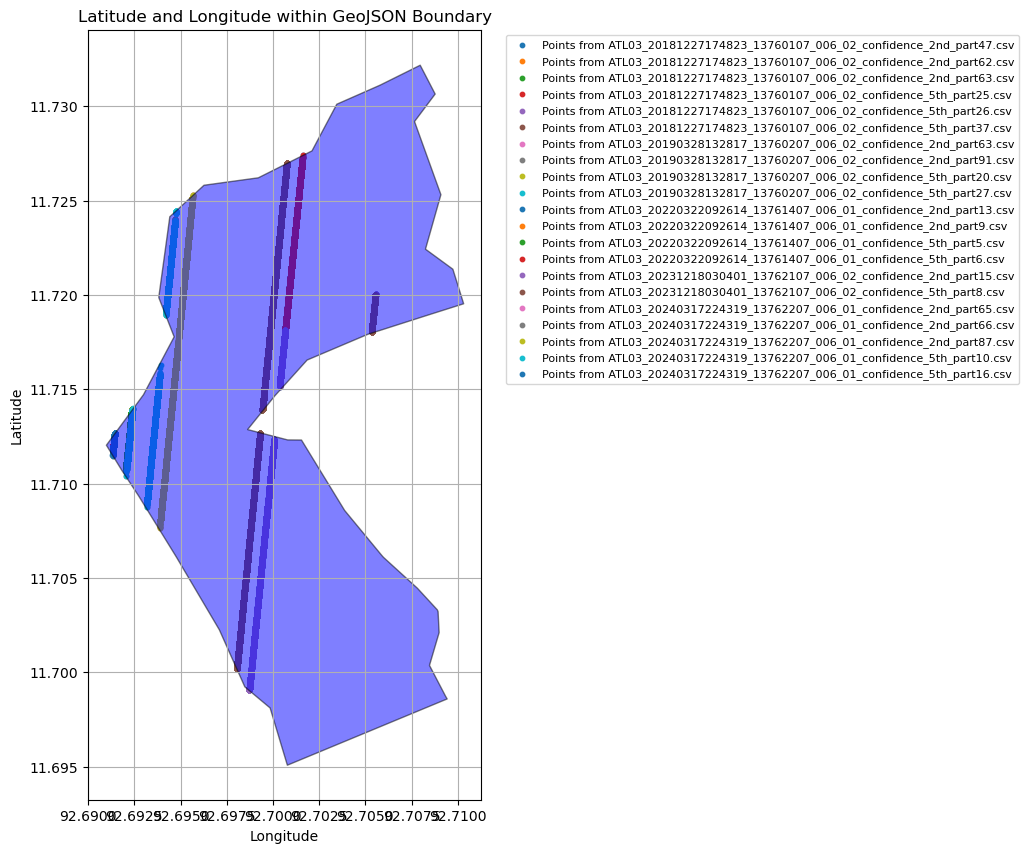

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas as gpd

# Folder containing the CSV files
folder_path = r"E:\Medha ka saaman\2\output_csv"

# GeoJSON file path
geojson_path = r"E:\Medha ka saaman\andaman350geojason.geojson"

# Load the GeoJSON file
geojson_data = gpd.read_file(geojson_path)

# Initialize the plot
plt.figure(figsize=(12, 10))

# Use union_all() method to combine geometries in GeoJSON
geojson_union = geojson_data.geometry.union_all()

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the required columns exist
        if 'Latitude' in df.columns and 'Longitude' in df.columns:
            # Convert latitude and longitude to numeric values, forcing errors to NaN
            df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
            df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
            
            # Remove rows with missing latitude or longitude
            df = df.dropna(subset=['Latitude', 'Longitude'])
            
            # Create a GeoDataFrame from the dataframe
            points = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_xy(df['Longitude'], df['Latitude']))
            
            # Check if the points are within the GeoJSON region (the shapefile)
            points_in_geojson = points[points.geometry.within(geojson_union)]
            
            # Plot the points that lie within the GeoJSON region
            if not points_in_geojson.empty:
                plt.scatter(points_in_geojson['Longitude'], points_in_geojson['Latitude'], s=10, label=f"Points from {file_name}")

# Plot the GeoJSON shapefile
geojson_data.plot(ax=plt.gca(), color='blue', edgecolor='black', alpha=0.5, label="GeoJSON Region")

# Customize the plot
plt.title("Latitude and Longitude within GeoJSON Boundary")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Place the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout to ensure the plot and legend fit
plt.subplots_adjust(right=0.8)  # Adjust the plot area to leave space for the legend

# Show the plot
plt.show()
